# Cleaning data before predicitons

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
data=pd.read_csv('Summary of Weather.csv', low_memory=False)
df= pd.DataFrame(data)

df.head(10)


,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,10001,1942-7-6,0,NaN,26.666667,21.666667,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,10001,1942-7-7,T,NaN,28.333333,22.777778,25.555556,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,10001,1942-7-8,3.556,NaN,26.666667,22.222222,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,10001,1942-7-9,T,NaN,27.222222,22.777778,25.000000,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10001,1942-7-10,3.556,NaN,25.555556,21.666667,23.333333,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Taking only the columns that matter in this prediction**

In [14]:
df_temp= df[['MinTemp','MaxTemp']]

df_temp

,MinTemp,MaxTemp
0,22.222222,25.555556
1,21.666667,28.888889
2,22.222222,26.111111
3,22.222222,26.666667
4,21.666667,26.666667
...,...,...
119035,18.333333,28.333333
119036,18.333333,29.444444
119037,18.333333,28.333333
119038,18.333333,28.333333


**Checking for missing values if any**

In [15]:
df_temp.isna().sum()
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119040 entries, 0 to 119039
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   MinTemp  119040 non-null  float64
 1   MaxTemp  119040 non-null  float64
dtypes: float64(2)
memory usage: 1.8 MB


# Importing scikit learn to make the prediction

In [16]:
from sklearn.linear_model import LinearRegression # Selecting a linear model
from sklearn.model_selection import train_test_split  
from sklearn.metrics import root_mean_squared_error #selecting a loss function
from sklearn.metrics import r2_score

**setting up features(x) and target variable(y)**

In [17]:
x= df_temp[['MinTemp']]
y=df['MaxTemp']

#splitting data(train/test) :
X_train, X_test, y_train, y_test= train_test_split(x,y,test_size=0.20,random_state=42)

**Selecting a model and running the prediction**

In [18]:
model=LinearRegression()

#fitting the model

model.fit(X_train,y_train)

#Making predictions

y_pred= model.predict(X_test)



**Checking predictions**

In [19]:
mse= root_mean_squared_error(y_test,y_pred)
r2= r2_score(y_test,y_pred)
print("MSE:", mse)
print("R2:", r2)
print("Weight (slope):", model.coef_)
print("Bias (intercept):", model.intercept_)

MSE: 4.1370654802766
R2: 0.7721546572113719
Weight (slope): [0.91888999]
Bias (intercept): 10.688361885874532


In [20]:
user_x= [[32]]
prediction=model.predict(user_x)
print(prediction)

[40.09284172]


/home/aayam/Documents/MachineLearning/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


**visualizing the predictions**

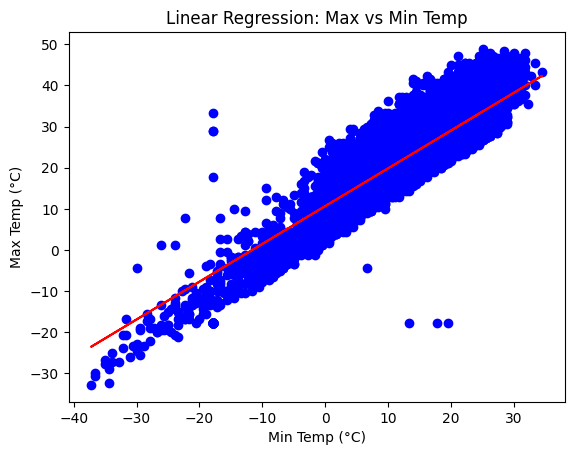

In [21]:
plt.scatter(X_test,y_test,color='blue')
plt.plot(X_test,y_pred,color='red')
plt.xlabel('Min Temp (°C)')
plt.ylabel('Max Temp (°C)')
plt.title('Linear Regression: Max vs Min Temp')
plt.show()


# Conclusion: With an r2 score of 0.77. the model predicts the max temp given min temp decently with the given features